**Insight Flow**  
**Intro to Datascience Project**  
Travis Draper  
Dane Bartholomew  
Alex Beams

This is the first cell where we focused primarily on leaving code notes, and importing necessary modules for the whole document.

In [87]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
# This next line tells jupyter to render the images inline
%matplotlib inline
import numpy as np


#water years run from october-september (important for precip accumulation start of month values)
#try to use snow depth/snow water equivalent to infer temperature in the winter time, or see if they are correlated
# see if precipitation on its own is strongly predictive for temperature when that data exists; if so, use it to infer what missing values might be
#consider that in later years, more low-precipitation sites might have been added -- maybe that drives averages lower in more reent years

This next block is where we import the csv file containing all of the data we are going to work with.  There are several things that we are still trying to figure out such as how to deal with the missing data. There is also the question of trying to do web scraping to get more location data for each of the project sites.

In [4]:
#snowfall = pd.read_csv("snotel_simple.csv")
snowfall = pd.read_csv('Snotel_big.csv')
snowfall.head()

,Date,Station Id,Station Name,Elevation (ft),Precipitation Accumulation (in) Start of Month Values,Precipitation Increment (in),Snow Water Equivalent (in) Start of Month Values,Snow Depth (in) Start of Month Values,Air Temperature Average (degF),Air Temperature Maximum (degF),Air Temperature Minimum (degF)
0,Oct-94,907,Agua Canyon,8900,0.0,2.0,0.0,NaN,NaN,NaN,NaN
1,Nov-94,907,Agua Canyon,8900,2.0,2.8,0.0,NaN,NaN,NaN,NaN
2,Dec-94,907,Agua Canyon,8900,4.8,2.7,2.3,NaN,NaN,NaN,NaN
3,Jan-95,907,Agua Canyon,8900,7.5,5.6,4.7,NaN,NaN,NaN,NaN
4,Feb-95,907,Agua Canyon,8900,13.1,3.0,10.5,NaN,NaN,NaN,NaN


Here we are trying to figure out a way to work with the dates given so that we can actually run through the data as a time series.  Breaking stuff up was surprisingly difficult.

In [5]:
dat = snowfall[['Date', 'Precipitation Accumulation (in) Start of Month Values']]
grouped = dat.groupby('Date').mean()

In [6]:
dates = snowfall['Date'].str.split('-')
int(dates[0][1])

94

In [7]:
yearvec = []
for i in range(len(dates)):
    if(int(dates[i][1]) < 19):
        year = 2000 + int(dates[i][1])
    else:
        year = 1900 + int(dates[i][1])
    yearvec.append(year)


In [8]:
yearvec
snowfall['year'] = yearvec

In [9]:
monthvec = []
for i in range(len(dates)):
    monthvec.append(dates[i][0])
    
snowfall['month'] = monthvec

In [10]:
snowfall.head()

,Date,Station Id,Station Name,Elevation (ft),Precipitation Accumulation (in) Start of Month Values,Precipitation Increment (in),Snow Water Equivalent (in) Start of Month Values,Snow Depth (in) Start of Month Values,Air Temperature Average (degF),Air Temperature Maximum (degF),Air Temperature Minimum (degF),year,month
0,Oct-94,907,Agua Canyon,8900,0.0,2.0,0.0,NaN,NaN,NaN,NaN,1994,Oct
1,Nov-94,907,Agua Canyon,8900,2.0,2.8,0.0,NaN,NaN,NaN,NaN,1994,Nov
2,Dec-94,907,Agua Canyon,8900,4.8,2.7,2.3,NaN,NaN,NaN,NaN,1994,Dec
3,Jan-95,907,Agua Canyon,8900,7.5,5.6,4.7,NaN,NaN,NaN,NaN,1995,Jan
4,Feb-95,907,Agua Canyon,8900,13.1,3.0,10.5,NaN,NaN,NaN,NaN,1995,Feb


Here we get the first early data exploration.  The precipitation increment is the value that we are most interested in here for actually calculating rainfall, and snowfall.  We still have a lot of work to do before we can fully work on the temperature data.

In [11]:
monthgroups = snowfall.groupby('month')
monthprecips = monthgroups['Precipitation Increment (in)'].mean()
#monthprecips.plot()
monthprecips

month
Apr    3.103043
Aug    1.891253
Dec    3.335896
Feb    3.159725
Jan    3.306673
Jul    1.586990
Jun    1.261953
Mar    3.339428
May    2.549240
Nov    2.887219
Oct    2.565217
Sep    2.305897
Name: Precipitation Increment (in), dtype: float64

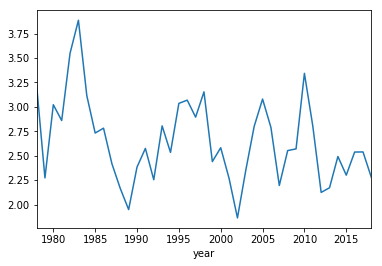

In [12]:
yeargroups = snowfall.groupby('year')
yearprecips = yeargroups['Precipitation Increment (in)'].mean()
yearprecips.plot()

In [13]:
stationgroups = snowfall.groupby('Station Name')
stationPrecips = stationgroups['Precipitation Increment (in)'].mean()
stationPrecips

Station Name
Agua Canyon             1.921708
Bear River RS           1.982955
Beaver Dams             2.300000
Beaver Divide           2.379915
Ben Lomond Peak         5.045666
Ben Lomond Trail        3.608909
Bevans Cabin            2.446377
Big Flat                2.796368
Black Flat-U.M. Ck      1.834234
Blacks Fork Jct         1.995455
Bobs Hollow             2.831250
Box Creek               2.159243
Box Springs             1.968889
Brian Head              2.411538
Brighton                3.390186
Brown Duck              2.868710
Buck Flat               2.638511
Buck Pasture            2.229333
Buckboard Flat          2.362319
Bug Lake                2.539112
Burts Miller Ranch      1.330769
Camp Jackson            2.414396
Cascade Mountain        2.879348
Castle Valley           2.194655
Chalk Creek #1          3.311628
Chalk Creek #2          2.453178
Chepeta                 2.525390
Clayton Springs         2.205660
Clear Creek #1          2.649149
Clear Creek #2          2.2281

We can see here below that at least in one dimension there doesn't seem to be a relationship between average precipitation and elevation, which would make sense.  We think that we should be able to find a way to fit precipitation data once we have latitude and longitude data.  

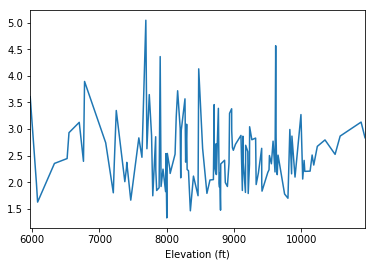

In [14]:
elevationgroups = snowfall.groupby('Elevation (ft)')
elevationPrecips = elevationgroups['Precipitation Increment (in)'].mean()
elevationPrecips.plot()

In [15]:
null_data = snowfall[snowfall.isnull().any(axis=1)]
null_data.head()

,Date,Station Id,Station Name,Elevation (ft),Precipitation Accumulation (in) Start of Month Values,Precipitation Increment (in),Snow Water Equivalent (in) Start of Month Values,Snow Depth (in) Start of Month Values,Air Temperature Average (degF),Air Temperature Maximum (degF),Air Temperature Minimum (degF),year,month
0,Oct-94,907,Agua Canyon,8900,0.0,2.0,0.0,NaN,NaN,NaN,NaN,1994,Oct
1,Nov-94,907,Agua Canyon,8900,2.0,2.8,0.0,NaN,NaN,NaN,NaN,1994,Nov
2,Dec-94,907,Agua Canyon,8900,4.8,2.7,2.3,NaN,NaN,NaN,NaN,1994,Dec
3,Jan-95,907,Agua Canyon,8900,7.5,5.6,4.7,NaN,NaN,NaN,NaN,1995,Jan
4,Feb-95,907,Agua Canyon,8900,13.1,3.0,10.5,NaN,NaN,NaN,NaN,1995,Feb


This is the part of the document where we are starting to do the web scraping.  We are able to get the websites rather simply, but it turns out that getting the latitude and longitude data is harder than we had anticipated since it is not between any type of html tags.  This has made the use of BeautifulSoup much harder than we initially had anticipated.  At the moment we seem to be able to gather a string that contains the latitude and longitude data for each station using Regular Expressions. (RegEx) We still have not found a way to remove the junk from these and add them to the dataframe.

In [16]:
stationids = snowfall['Station Id']
stationList = stationids.unique()

In [28]:
import time
import requests
import urllib.request
from bs4 import BeautifulSoup

In [18]:
urls = []
for item in stationList:
    urls.append('https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=' + str(item) + '&state=ut')
    

In [19]:
len(urls)

132

In [26]:
# responses = []
# for idx, url in enumerate(urls):
#    response = requests.get(url)
#    responses.append(response.text)
#    print('got the webpage')
#    if idx%10 == 0 and idx != 0:
#        time.sleep(2)
        

got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the webpage
got the 

In [22]:
# with open('sitePages.html', 'w') as my_file:
#     my_file.write(str(responses))

In [32]:
soups = []
for response in responses:
    soup = BeautifulSoup(response, 'lxml')
    soups.append(soup)

In [24]:
# for br in soup.findAll('br'):
#     next_s = br.nextSibling
#     if not (next_s and isinstance(next_s,BeautifulSoup.NavigableString)):
#         continue
#     next2_s = next_s.nextSibling
#     if next2_s and isinstance(next2_s,Tag) and next2_s.name == 'br':
#         text = str(next_s).strip()
#         if text:
#             print("Found:", next_s)

AttributeError: type object 'BeautifulSoup' has no attribute 'NavigableString'

In [25]:
# row =  soups[0].find_all('td valign="top"', string='Latitude:')
# for r in row:
#     nextSib = r.nextSibling
#     while nextSib.name != 'strong' and nextSib is not None:
#             nextSib = nextSib.nextSibling
# print(nextSib.text)

NameError: name 'nextSib' is not defined

In [26]:
# for br in soups[0].find_all('br'):
#     if str(type(br.contents[0])) == '<class \'BeautifulSoup.NavigableString\'>':
#         print(br.contents)

IndexError: list index out of range

In [33]:
import re

# latitudes = []
# longitudes = []
# for i in range(len(urls)):
#     tds = soups[i].find_all('td')
#     latitudes.append(re.findall(r"</strong> +[0-9]{2} +deg; +[0-9]{1}[\s]|</strong> +[0-9]{2} +deg; +[0-9]{2}[\s]", str(tds)))
#     longitudes.append(re.findall(r"</strong> +[0-9][0-9][0-9] +deg; +[0-9]{2} |</strong> +[0-9][0-9][0-9] +deg; +[0-9]{1}", str(tds)))

# longitudes
#latitudes

[['</strong> 112 deg; 16 ', '</strong> 112 deg; 16 '],
 ['</strong> 110 deg; 50 ', '</strong> 110 deg; 50 '],
 ['</strong> 111 deg; 33 ', '</strong> 111 deg; 33 '],
 ['</strong> 111 deg; 6', '</strong> 111 deg; 6'],
 ['</strong> 111 deg; 57 ', '</strong> 111 deg; 57 '],
 ['</strong> 111 deg; 55 ', '</strong> 111 deg; 55 '],
 ['</strong> 112 deg; 15 ', '</strong> 112 deg; 15 '],
 ['</strong> 112 deg; 21 ', '</strong> 112 deg; 21 '],
 ['</strong> 111 deg; 36 ', '</strong> 111 deg; 36 '],
 ['</strong> 110 deg; 35 ', '</strong> 110 deg; 35 '],
 ['</strong> 112 deg; 9', '</strong> 112 deg; 9'],
 ['</strong> 112 deg; 1', '</strong> 112 deg; 1'],
 ['</strong> 112 deg; 0', '</strong> 112 deg; 0'],
 ['</strong> 112 deg; 51 ', '</strong> 112 deg; 51 '],
 ['</strong> 111 deg; 35 ', '</strong> 111 deg; 35 '],
 ['</strong> 110 deg; 35 ', '</strong> 110 deg; 35 '],
 ['</strong> 111 deg; 26 ', '</strong> 111 deg; 26 '],
 ['</strong> 110 deg; 40 ', '</strong> 110 deg; 40 '],
 ['</strong> 109 deg; 27 '

In [34]:
# longitude_numeric= []
# latitude_numeric = []
# for entry in longitudes:
#     block = entry[0].split(' ')
#     result = int(block[1]) + (float(block[3])/60)
#     longitude_numeric.append(result)
    
# for entry in latitudes:
#     block = entry[0].split(' ')
#     result = int(block[1]) + (float(block[3])/60)
#     latitude_numeric.append(result)    

In [34]:
##longitudes[0][0].split(' ')
#longitude_numeric[5]

111.91666666666667

In [35]:
# with open('latitudes_num.txt', 'w') as my_file:
#     my_file.write(str(latitude_numeric))
    
# with open('longitudes_num.txt', 'w') as my_file:
#     my_file.write(str(longitude_numeric))

In [37]:
# with open('latitudes.txt', 'w') as my_file:
#     my_file.write(str(latitudes))
    
# with open('longitudes.txt', 'w') as my_file:
#     my_file.write(str(longitudes))

In [36]:
with open('longitudes_num.txt','r') as data:
    longs = data.read()
test_longitude = longs.replace('[','').replace(']','').split(', ')
for idx, item in enumerate(test_longitude):
    test_longitude[idx]= float(item)
test_longitude    

[112.26666666666667,
 110.83333333333333,
 111.55,
 111.1,
 111.95,
 111.91666666666667,
 112.25,
 112.35,
 111.6,
 110.58333333333333,
 112.15,
 112.01666666666667,
 112.0,
 112.85,
 111.58333333333333,
 110.58333333333333,
 111.43333333333334,
 110.66666666666667,
 109.45,
 111.41666666666667,
 110.85,
 109.48333333333333,
 111.61666666666666,
 112.73333333333333,
 111.05,
 111.06666666666666,
 110.01666666666667,
 111.83333333333333,
 111.28333333333333,
 111.25,
 110.38333333333334,
 111.08333333333333,
 111.25,
 111.46666666666667,
 111.46666666666667,
 111.53333333333333,
 112.16666666666667,
 109.53333333333333,
 110.53333333333333,
 111.81666666666666,
 111.81666666666666,
 111.68333333333334,
 111.76666666666667,
 110.46666666666667,
 111.46666666666667,
 113.46666666666667,
 111.48333333333333,
 111.45,
 113.41666666666667,
 111.68333333333334,
 111.68333333333334,
 113.95,
 111.71666666666667,
 112.58333333333333,
 110.88333333333334,
 110.38333333333334,
 110.48333333333333

In [38]:
with open('latitudes_num.txt','r') as data:
    lats = data.read()
test_latitude = lats.replace('[','').replace(']','').split(', ')
for idx, item in enumerate(test_latitude):
    test_latitude[idx]= float(item)
test_latitude   

[37.516666666666666,
 40.88333333333333,
 39.13333333333333,
 40.61666666666667,
 41.38333333333333,
 41.38333333333333,
 40.46666666666667,
 38.3,
 38.68333333333333,
 40.95,
 38.95,
 38.5,
 38.5,
 37.68333333333333,
 40.6,
 40.583333333333336,
 39.13333333333333,
 40.85,
 37.86666666666667,
 41.68333333333333,
 40.983333333333334,
 37.81666666666667,
 40.28333333333333,
 37.666666666666664,
 40.85,
 40.88333333333333,
 40.766666666666666,
 37.96666666666667,
 39.86666666666667,
 39.9,
 39.65,
 40.35,
 40.3,
 39.05,
 38.21666666666667,
 41.416666666666664,
 40.56666666666667,
 39.31666666666667,
 40.88333333333333,
 40.96666666666667,
 41.0,
 38.766666666666666,
 38.5,
 40.71666666666667,
 41.916666666666664,
 37.4,
 39.31666666666667,
 39.3,
 41.916666666666664,
 38.8,
 38.78333333333333,
 37.5,
 40.86666666666667,
 37.483333333333334,
 40.8,
 40.86666666666667,
 40.95,
 40.9,
 40.18333333333333,
 40.916666666666664,
 41.31666666666667,
 39.61666666666667,
 39.88333333333333,
 38.066

In [49]:
sites = pd.read_csv("snotel_sites.csv")
sites

,Data sites
0,#\tSNOTEL 907: Agua Canyon\t UT
1,#\tSNOTEL 992: Bear River RS\t UT
2,#\tSNOTEL 329: Beaver Dams\t UT
3,#\tSNOTEL 330: Beaver Divide\t UT
4,#\tSNOTEL 332: Ben Lomond Peak\t UT
5,#\tSNOTEL 333: Ben Lomond Trail\t UT
6,#\tSNOTEL 1214: Bevans Cabin\t UT
7,#\tSNOTEL 339: Big Flat\t UT
8,#\tSNOTEL 348: Black Flat-U.M. Ck\t UT
9,#\tSNOTEL 1162: Blacks Fork Jct\t UT


In [50]:
sites['Longitude'] = test_longitude
sites['Latitude'] = test_latitude

In [51]:
siteID = []
for site in sites['Data sites']:
    sitestuff = site.replace(':','').split(' ')
    number = sitestuff[1]
    siteID.append(number)

In [53]:
sites['Site ID'] = siteID

In [55]:
sites.head(10)

,Data sites,Longitude,Latitude,Site ID
0,#\tSNOTEL 907: Agua Canyon\t UT,112.266667,37.516667,907
1,#\tSNOTEL 992: Bear River RS\t UT,110.833333,40.883333,992
2,#\tSNOTEL 329: Beaver Dams\t UT,111.550000,39.133333,329
3,#\tSNOTEL 330: Beaver Divide\t UT,111.100000,40.616667,330
4,#\tSNOTEL 332: Ben Lomond Peak\t UT,111.950000,41.383333,332
5,#\tSNOTEL 333: Ben Lomond Trail\t UT,111.916667,41.383333,333
6,#\tSNOTEL 1214: Bevans Cabin\t UT,112.250000,40.466667,1214
7,#\tSNOTEL 339: Big Flat\t UT,112.350000,38.300000,339
8,#\tSNOTEL 348: Black Flat-U.M. Ck\t UT,111.600000,38.683333,348
9,#\tSNOTEL 1162: Blacks Fork Jct\t UT,110.583333,40.950000,1162


In [122]:
sites['Site ID'] = pd.to_numeric(sites['Site ID'])


In [119]:
keys = sites['Site ID']
values = sites['Longitude']
values_lat = sites['Latitude']
long_dict = dict(zip(keys,values))
lat_dict = dict(zip(keys,values_lat))

In [120]:
long_dict
lat_dict

{329: 39.133333333333333,
 330: 40.616666666666667,
 332: 41.383333333333333,
 333: 41.383333333333333,
 339: 38.299999999999997,
 348: 38.68333333333333,
 364: 38.5,
 366: 40.600000000000001,
 368: 40.583333333333336,
 371: 39.133333333333333,
 374: 41.68333333333333,
 383: 37.81666666666667,
 390: 37.666666666666664,
 392: 40.850000000000001,
 393: 40.883333333333333,
 396: 40.766666666666666,
 399: 39.866666666666667,
 400: 39.899999999999999,
 432: 40.350000000000001,
 435: 40.299999999999997,
 444: 39.049999999999997,
 452: 38.216666666666669,
 455: 41.416666666666664,
 461: 39.31666666666667,
 474: 40.966666666666669,
 475: 38.766666666666666,
 481: 40.716666666666669,
 495: 38.799999999999997,
 513: 40.733333333333334,
 514: 37.483333333333334,
 517: 40.799999999999997,
 521: 40.950000000000003,
 522: 40.899999999999999,
 528: 40.916666666666664,
 533: 41.31666666666667,
 543: 39.883333333333333,
 557: 38.483333333333334,
 559: 40.716666666666669,
 561: 37.533333333333331,
 566:

In [77]:
sites.set_index('Site ID')

,Data sites,Longitude,Latitude
Site ID,,,
907,#\tSNOTEL 907: Agua Canyon\t UT,112.266667,37.516667
992,#\tSNOTEL 992: Bear River RS\t UT,110.833333,40.883333
329,#\tSNOTEL 329: Beaver Dams\t UT,111.550000,39.133333
330,#\tSNOTEL 330: Beaver Divide\t UT,111.100000,40.616667
332,#\tSNOTEL 332: Ben Lomond Peak\t UT,111.950000,41.383333
333,#\tSNOTEL 333: Ben Lomond Trail\t UT,111.916667,41.383333
1214,#\tSNOTEL 1214: Bevans Cabin\t UT,112.250000,40.466667
339,#\tSNOTEL 339: Big Flat\t UT,112.350000,38.300000
348,#\tSNOTEL 348: Black Flat-U.M. Ck\t UT,111.600000,38.683333


In [78]:
snowfall.set_index('Station Id')

,Date,Station Name,Elevation (ft),Precipitation Accumulation (in) Start of Month Values,Precipitation Increment (in),Snow Water Equivalent (in) Start of Month Values,Snow Depth (in) Start of Month Values,Air Temperature Average (degF),Air Temperature Maximum (degF),Air Temperature Minimum (degF),year,month
Station Id,,,,,,,,,,,,
907,Oct-94,Agua Canyon,8900,0.0,2.0,0.0,NaN,NaN,NaN,NaN,1994,Oct
907,Nov-94,Agua Canyon,8900,2.0,2.8,0.0,NaN,NaN,NaN,NaN,1994,Nov
907,Dec-94,Agua Canyon,8900,4.8,2.7,2.3,NaN,NaN,NaN,NaN,1994,Dec
907,Jan-95,Agua Canyon,8900,7.5,5.6,4.7,NaN,NaN,NaN,NaN,1995,Jan
907,Feb-95,Agua Canyon,8900,13.1,3.0,10.5,NaN,NaN,NaN,NaN,1995,Feb
907,Mar-95,Agua Canyon,8900,16.1,5.1,12.5,NaN,NaN,NaN,NaN,1995,Mar
907,Apr-95,Agua Canyon,8900,21.2,2.7,15.5,NaN,NaN,NaN,NaN,1995,Apr
907,May-95,Agua Canyon,8900,23.9,1.9,5.8,NaN,NaN,NaN,NaN,1995,May
907,Jun-95,Agua Canyon,8900,25.8,1.2,0.0,NaN,NaN,NaN,NaN,1995,Jun


In [84]:
snowfall.loc[1,:]

Date                                                          Nov-94
Station Id                                                       907
Station Name                                             Agua Canyon
Elevation (ft)                                                  8900
Precipitation Accumulation (in) Start of Month Values              2
Precipitation Increment (in)                                     2.8
Snow Water Equivalent (in) Start of Month Values                   0
Snow Depth (in) Start of Month Values                            NaN
Air Temperature Average (degF)                                   NaN
Air Temperature Maximum (degF)                                   NaN
Air Temperature Minimum (degF)                                   NaN
year                                                            1994
month                                                            Nov
Name: 1, dtype: object

In [89]:
snowfall['Longitude'] = np.nan
snowfall['Latitude'] = np.nan

,Date,Station Id,Station Name,Elevation (ft),Precipitation Accumulation (in) Start of Month Values,Precipitation Increment (in),Snow Water Equivalent (in) Start of Month Values,Snow Depth (in) Start of Month Values,Air Temperature Average (degF),Air Temperature Maximum (degF),Air Temperature Minimum (degF),year,month,Longitude,Latitude
0,Oct-94,907,Agua Canyon,8900,0.0,2.0,0.0,NaN,NaN,NaN,NaN,1994,Oct,NaN,NaN
1,Nov-94,907,Agua Canyon,8900,2.0,2.8,0.0,NaN,NaN,NaN,NaN,1994,Nov,NaN,NaN
2,Dec-94,907,Agua Canyon,8900,4.8,2.7,2.3,NaN,NaN,NaN,NaN,1994,Dec,NaN,NaN
3,Jan-95,907,Agua Canyon,8900,7.5,5.6,4.7,NaN,NaN,NaN,NaN,1995,Jan,NaN,NaN
4,Feb-95,907,Agua Canyon,8900,13.1,3.0,10.5,NaN,NaN,NaN,NaN,1995,Feb,NaN,NaN
5,Mar-95,907,Agua Canyon,8900,16.1,5.1,12.5,NaN,NaN,NaN,NaN,1995,Mar,NaN,NaN
6,Apr-95,907,Agua Canyon,8900,21.2,2.7,15.5,NaN,NaN,NaN,NaN,1995,Apr,NaN,NaN
7,May-95,907,Agua Canyon,8900,23.9,1.9,5.8,NaN,NaN,NaN,NaN,1995,May,NaN,NaN
8,Jun-95,907,Agua Canyon,8900,25.8,1.2,0.0,NaN,NaN,NaN,NaN,1995,Jun,NaN,NaN
9,Jul-95,907,Agua Canyon,8900,27.0,0.0,0.0,NaN,NaN,NaN,NaN,1995,Jul,NaN,NaN


In [125]:
snowfall['Longitude'] = snowfall['Station Id'].map(long_dict)
snowfall['Latitude'] = snowfall['Station Id'].map(lat_dict)


In [126]:
sites.dtypes

Data sites     object
Longitude     float64
Latitude      float64
Site ID         int64
dtype: object

In [127]:
snowfall

,Date,Station Id,Station Name,Elevation (ft),Precipitation Accumulation (in) Start of Month Values,Precipitation Increment (in),Snow Water Equivalent (in) Start of Month Values,Snow Depth (in) Start of Month Values,Air Temperature Average (degF),Air Temperature Maximum (degF),Air Temperature Minimum (degF),year,month,Longitude,Latitude
0,Oct-94,907,Agua Canyon,8900,0.0,2.0,0.0,NaN,NaN,NaN,NaN,1994,Oct,112.266667,37.516667
1,Nov-94,907,Agua Canyon,8900,2.0,2.8,0.0,NaN,NaN,NaN,NaN,1994,Nov,112.266667,37.516667
2,Dec-94,907,Agua Canyon,8900,4.8,2.7,2.3,NaN,NaN,NaN,NaN,1994,Dec,112.266667,37.516667
3,Jan-95,907,Agua Canyon,8900,7.5,5.6,4.7,NaN,NaN,NaN,NaN,1995,Jan,112.266667,37.516667
4,Feb-95,907,Agua Canyon,8900,13.1,3.0,10.5,NaN,NaN,NaN,NaN,1995,Feb,112.266667,37.516667
5,Mar-95,907,Agua Canyon,8900,16.1,5.1,12.5,NaN,NaN,NaN,NaN,1995,Mar,112.266667,37.516667
6,Apr-95,907,Agua Canyon,8900,21.2,2.7,15.5,NaN,NaN,NaN,NaN,1995,Apr,112.266667,37.516667
7,May-95,907,Agua Canyon,8900,23.9,1.9,5.8,NaN,NaN,NaN,NaN,1995,May,112.266667,37.516667
8,Jun-95,907,Agua Canyon,8900,25.8,1.2,0.0,NaN,NaN,NaN,NaN,1995,Jun,112.266667,37.516667
9,Jul-95,907,Agua Canyon,8900,27.0,0.0,0.0,NaN,NaN,NaN,NaN,1995,Jul,112.266667,37.516667


In [118]:
long_dict[907]

KeyError: 907